# TFM - Análisis de Datos de Reviews

Este notebook implementa el análisis exploratorio de datos para reviews de restaurantes del dataset de Yelp.

**Título del TFM**: Análisis de Datos y Procesamiento de Lenguaje Natural para la Extracción de Opiniones y Modelado de Tópicos en Restaurantes: Un Enfoque de Big Data y Ciencia de Datos Aplicado al Estudio Integral del Sector Gastronómico

## Objetivo del Notebook
Realizar un análisis exhaustivo de los datos de reviews que:
1. Cargue y explore el dataset de reviews procesado
2. Analice la distribución de calificaciones por estrellas
3. Identifique usuarios más activos y patrones de engagement
4. Examine las métricas de utilidad (useful, funny, cool)
5. Genere insights sobre el comportamiento de los usuarios

## Estructura de Datos
El dataset de reviews contiene información sobre:
- **Identificadores**: review_id, user_id, business_id únicos
- **Calificaciones**: Estrellas de 1 a 5 por cada review
- **Contenido**: Texto completo de las reseñas
- **Engagement**: Votos de útil, divertido y cool
- **Temporal**: Fechas de las reseñas para análisis temporal

## Características del Análisis
- Análisis completo de distribución de calificaciones
- Identificación de usuarios más activos por número de reviews
- Análisis de engagement y métricas de utilidad
- Exploración de patrones temporales en las reseñas
- Análisis de longitud y características del texto
- Correlaciones entre calificaciones y engagement

## 1. Instalación y Configuración

### Librerías Requeridas

Para este análisis necesitamos las siguientes librerías principales:

- **pandas**: Manipulación y análisis de datos estructurados
- **numpy**: Cálculos numéricos y estadísticos
- **matplotlib/seaborn**: Visualizaciones estáticas y análisis gráfico
- **plotly**: Visualizaciones interactivas para exploración
- **datetime**: Manejo y análisis de fechas
- **collections**: Herramientas para conteo y análisis de datos
- **re**: Expresiones regulares para análisis de texto

### Configuración del Entorno

Se configuran las opciones de pandas para mostrar:
- Todas las columnas disponibles
- Ancho completo del contenido de las celdas
- Formato numérico legible para grandes cantidades
- Configuración para análisis de texto eficiente

In [1]:
# Instalación de dependencias para análisis de datos
# Descomenta la siguiente línea si necesitas instalar las librerías
# !uv add pandas numpy matplotlib seaborn plotly tqdm

In [2]:
# Imports necesarios para el análisis de datos de reviews
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from datetime import datetime
import re
from tqdm.auto import tqdm
import warnings
import os
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Crear directorio para guardar figuras
os.makedirs('../../figures/complete_analysis', exist_ok=True)

print("Configuración completada exitosamente")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")
print("Directorio de figuras creado: ../../figures/complete_analysis/")

Configuración completada exitosamente
Versión de pandas: 2.3.0
Versión de numpy: 2.2.6
Directorio de figuras creado: ../../figures/complete_analysis/


## 2. Carga de Datos de Reviews

### Archivo de Entrada

Cargaremos el archivo de reviews procesado previamente que contiene:
- **Identificadores únicos** (review_id, user_id, business_id)
- **Calificaciones** en estrellas (1-5) para cada review
- **Texto completo** de las reseñas para análisis de NLP
- **Métricas de engagement** (useful, funny, cool)
- **Información temporal** (fechas de las reseñas)

### Estructura Esperada del Dataset

El archivo JSON debe contener reviews con la siguiente estructura:
- `review_id`: Identificador único de la reseña (22 caracteres)
- `user_id`: Identificador del usuario que escribió la reseña (22 caracteres)
- `business_id`: Identificador del negocio reseñado (22 caracteres)
- `stars`: Calificación en estrellas (1-5)
- `date`: Fecha de la reseña (formato YYYY-MM-DD)
- `text`: Contenido textual completo de la reseña
- `useful`: Número de votos de utilidad recibidos
- `funny`: Número de votos de diversión recibidos
- `cool`: Número de votos de cool recibidos

### Rutas de Búsqueda

El notebook intentará cargar el archivo desde múltiples ubicaciones:
1. `../../data/processed/reviews.json` (desde notebooks/)
2. `../data/processed/reviews.json` (desde data-analysis/)
3. `data/processed/reviews.json` (desde raíz del proyecto)

In [3]:
# Cargar datos de reviews de restaurantes
print("Iniciando carga de datos de reviews...")

# Intentar cargar desde diferentes rutas del proyecto
try:
    df_reviews = pd.read_json('../../data/processed/reviews.json')
    print("Datos cargados exitosamente desde '../../data/processed/reviews.json'")
    ruta_carga = "../../data/processed/reviews.json"
except:
    try:
        df_reviews = pd.read_json('../data/processed/reviews.json')
        print("Datos cargados exitosamente desde '../data/processed/reviews.json'")
        ruta_carga = "../data/processed/reviews.json"
    except:
        try:
            df_reviews = pd.read_json('data/processed/reviews.json')
            print("Datos cargados exitosamente desde 'data/processed/reviews.json'")
            ruta_carga = "data/processed/reviews.json"
        except:
            print("ERROR: No se pudo cargar el archivo de reviews")
            print("SOLUCION: Asegúrate de que el archivo esté en alguna de estas rutas:")
            print("  - ../../data/processed/reviews.json")
            print("  - ../data/processed/reviews.json")
            print("  - data/processed/reviews.json")
            raise FileNotFoundError("Archivo de reviews no encontrado")

print(f"Dataset cargado correctamente: {len(df_reviews):,} reviews")
print(f"Ruta utilizada: {ruta_carga}")
print(f"Columnas disponibles: {list(df_reviews.columns)}")

Iniciando carga de datos de reviews...
Datos cargados exitosamente desde '../../data/processed/reviews.json'
Dataset cargado correctamente: 4,724,471 reviews
Ruta utilizada: ../../data/processed/reviews.json
Columnas disponibles: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


In [4]:
# Exploración inicial del dataset
print("Información del dataset cargado:")
print(f"- Total de reviews: {len(df_reviews):,}")
print(f"- Memoria utilizada: {df_reviews.memory_usage(deep=True).sum() / 1e6:.1f} MB")
print(f"- Forma del dataset: {df_reviews.shape}")

# Mostrar información detallada del DataFrame
print("\nInformación detallada del DataFrame:")
df_reviews.info()

Información del dataset cargado:
- Total de reviews: 4,724,471
- Memoria utilizada: 4161.4 MB
- Forma del dataset: (4724471, 9)

Información detallada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724471 entries, 0 to 4724470
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 324.4+ MB


In [5]:
# Mostrar las primeras filas del dataset para inspección
print("Primeras 5 filas del dataset:")
display(df_reviews.head())

print("\nÚltimas 3 filas del dataset:")
display(df_reviews.tail(3))

Primeras 5 filas del dataset:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,7snN_xdG7dtX4u1bdoNq0w,7iCjHZY74yCEF-Eajx5sIA,--ZVrH2X2QXBFdCilbirsw,5,0,0,0,"This place is sadly perm closed. I was hoping not, however the phone is now disconnected.",2018-02-24 00:53:41
1,5IJ8bbgtuaYY44jylnQ5lw,QD0DRN_ZY5czjHjzopEZzw,--ZVrH2X2QXBFdCilbirsw,3,0,0,0,"Really want this place to succeed, \nThey are attentive, customer service oriented, etc.\nPlace...",2015-02-02 16:21:45
2,smRZuMTLFML_GImDsPmQVw,PlsB30q5bR2raPMpuN1Wuw,--ZVrH2X2QXBFdCilbirsw,5,0,0,0,One of the best hoagies I've ever had. The prosciutto used in my classic italian was to die for....,2014-12-18 18:14:15
3,xgAqKM3xkeTCtXC78gdnnQ,Gv9KfGk5j69oE9LugsLKiw,--ZVrH2X2QXBFdCilbirsw,5,0,1,2,Moving into our new house and I think the Italian hoagie saved my life. Happy to be living close...,2014-03-15 01:57:33
4,P1tdzQkq2S6NERhQhcTGlw,AxWV_6i2gC8-YBWOwtC5KA,--ZVrH2X2QXBFdCilbirsw,5,1,0,1,"Based on the reviews from the customers, I ordered 2 hoagies trays for a party. Everyone wanted...",2016-03-31 16:39:04



Últimas 3 filas del dataset:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
4724468,e5qC-qGwg-Ao6L76eGpmNg,EOajY1L3ole3gLTCZ2xw1g,zzHtFjfM7NvuVM1HTsCLGA,5,3,0,1,This new spot has some excellent ramen. The noodles are fresh and bouncy. The portion of noodles...,2020-02-01 18:35:56
4724469,YFX2ywxwtYzMm20OWOTbnQ,j9-ZDwEDVFnZ7q2u9bjMYw,zzHtFjfM7NvuVM1HTsCLGA,5,3,0,2,To start as always with Laura's nut allergy. \n\nThey do not serve ANY nuts here! You are safe i...,2020-01-05 03:34:41
4724470,vCGyR7gclTbmnDbUM_Oxig,K4qDOjUQBQbYuAXS1dWb3Q,zzHtFjfM7NvuVM1HTsCLGA,5,1,0,1,Super yummy!!! Definitely a new favorite and will be returning often!\n\nWe went during the soft...,2020-02-08 23:15:01


In [6]:
# Análisis de valores nulos y estadísticas básicas
print("Análisis de valores nulos por columna:")
nulls_info = df_reviews.isnull().sum()
nulls_percentage = (nulls_info / len(df_reviews)) * 100

null_analysis = pd.DataFrame({
    'Valores_Nulos': nulls_info,
    'Porcentaje': nulls_percentage
})

# Mostrar solo columnas con valores nulos
null_analysis_filtered = null_analysis[null_analysis['Valores_Nulos'] > 0]
if len(null_analysis_filtered) > 0:
    print("\nColumnas con valores nulos:")
    display(null_analysis_filtered.sort_values('Valores_Nulos', ascending=False))
else:
    print("\nNo hay valores nulos en el dataset")

# Estadísticas básicas de columnas numéricas
print("\nEstadísticas básicas de columnas numéricas:")
num_cols = df_reviews.select_dtypes(include=['number']).columns
display(df_reviews[num_cols].describe())

# Verificar tipos de datos únicos
print("\nTipos de datos únicos por columna:")
for col in df_reviews.columns:
    unique_count = df_reviews[col].nunique()
    sample_values = df_reviews[col].dropna().unique()[:5]
    print(f"- {col}: {unique_count:,} valores únicos | Ejemplos: {list(sample_values)}")

Análisis de valores nulos por columna:

No hay valores nulos en el dataset

Estadísticas básicas de columnas numéricas:


,stars,useful,funny,cool
count,4724471.00,4724471.00,4724471.00,4724471.00
mean,3.79,0.98,0.30,0.48
std,1.39,2.74,1.72,2.16
min,1.00,-1.00,-1.00,-1.00
25%,3.00,0.00,0.00,0.00
50%,4.00,0.00,0.00,0.00
75%,5.00,1.00,0.00,0.00
max,5.00,420.00,792.00,404.00



Tipos de datos únicos por columna:
- review_id: 4,724,471 valores únicos | Ejemplos: ['7snN_xdG7dtX4u1bdoNq0w', '5IJ8bbgtuaYY44jylnQ5lw', 'smRZuMTLFML_GImDsPmQVw', 'xgAqKM3xkeTCtXC78gdnnQ', 'P1tdzQkq2S6NERhQhcTGlw']
- user_id: 1,445,990 valores únicos | Ejemplos: ['7iCjHZY74yCEF-Eajx5sIA', 'QD0DRN_ZY5czjHjzopEZzw', 'PlsB30q5bR2raPMpuN1Wuw', 'Gv9KfGk5j69oE9LugsLKiw', 'AxWV_6i2gC8-YBWOwtC5KA']
- business_id: 52,268 valores únicos | Ejemplos: ['--ZVrH2X2QXBFdCilbirsw', '-0FX23yAacC4bbLaGPvyxw', '-0jzoPt3UeXn6FUXVQvyPg', '-1B9pP_CrRBJYPICE5WbRA', '-2-ih3mE8KPyeKVIzpBfPQ']
- stars: 5 valores únicos | Ejemplos: [np.int64(5), np.int64(3), np.int64(4), np.int64(1), np.int64(2)]
- useful: 225 valores únicos | Ejemplos: [np.int64(0), np.int64(1), np.int64(2), np.int64(7), np.int64(5)]
- funny: 190 valores únicos | Ejemplos: [np.int64(0), np.int64(1), np.int64(2), np.int64(6), np.int64(3)]
- cool: 201 valores únicos | Ejemplos: [np.int64(0), np.int64(2), np.int64(1), np.int64(3), np.int64(4)]
- 

## 3. Análisis de Calificaciones por Estrellas

### Distribución de Calificaciones

Analizaremos la distribución de calificaciones para entender:
- **Conteo por estrellas**: Cuántas reviews tiene cada nivel de calificación
- **Patrones de calificación**: Tendencias en las valoraciones de usuarios
- **Distribución estadística**: Media, mediana y desviación estándar

### Metodología de Análisis

Para cada nivel de calificación (1-5 estrellas):
- **Conteo absoluto**: Número total de reviews por calificación
- **Porcentaje relativo**: Proporción de cada calificación del total
- **Análisis estadístico**: Estadísticas descriptivas completas

### Interpretación Esperada

- **Sesgo positivo**: Las reviews tienden a ser más positivas (4-5 estrellas)
- **Polarización**: Posible concentración en extremos (1, 5 estrellas)
- **Distribución normal vs sesgada**: Análisis del patrón de distribución

ANÁLISIS DE CALIFICACIONES POR ESTRELLAS

1. DISTRIBUCIÓN DE CALIFICACIONES
-----------------------------------
Distribución detallada por estrellas:
- 1 estrella(s): 567,185 reviews (12.01%)
- 2 estrella(s): 404,486 reviews (8.56%)
- 3 estrella(s): 543,108 reviews (11.50%)
- 4 estrella(s): 1,130,251 reviews (23.92%)
- 5 estrella(s): 2,079,441 reviews (44.01%)

2. ESTADÍSTICAS DE CALIFICACIONES
-----------------------------------
Estadísticas descriptivas de calificaciones:
- Promedio: 3.794 estrellas
- Mediana: 4.0 estrellas
- Moda: 5.0 estrellas
- Desviación estándar: 1.391
- Rango: 1.0 - 5.0 estrellas
- Sesgo: -0.889 (negativo)
- Curtosis: -0.550

3. ANÁLISIS DE TENDENCIAS
----------------------------
Clasificación por tendencia:
- Reviews positivas (4-5 estrellas): 3,209,692 (67.9%)
- Reviews neutrales (3 estrellas): 543,108 (11.5%)
- Reviews negativas (1-2 estrellas): 971,671 (20.6%)


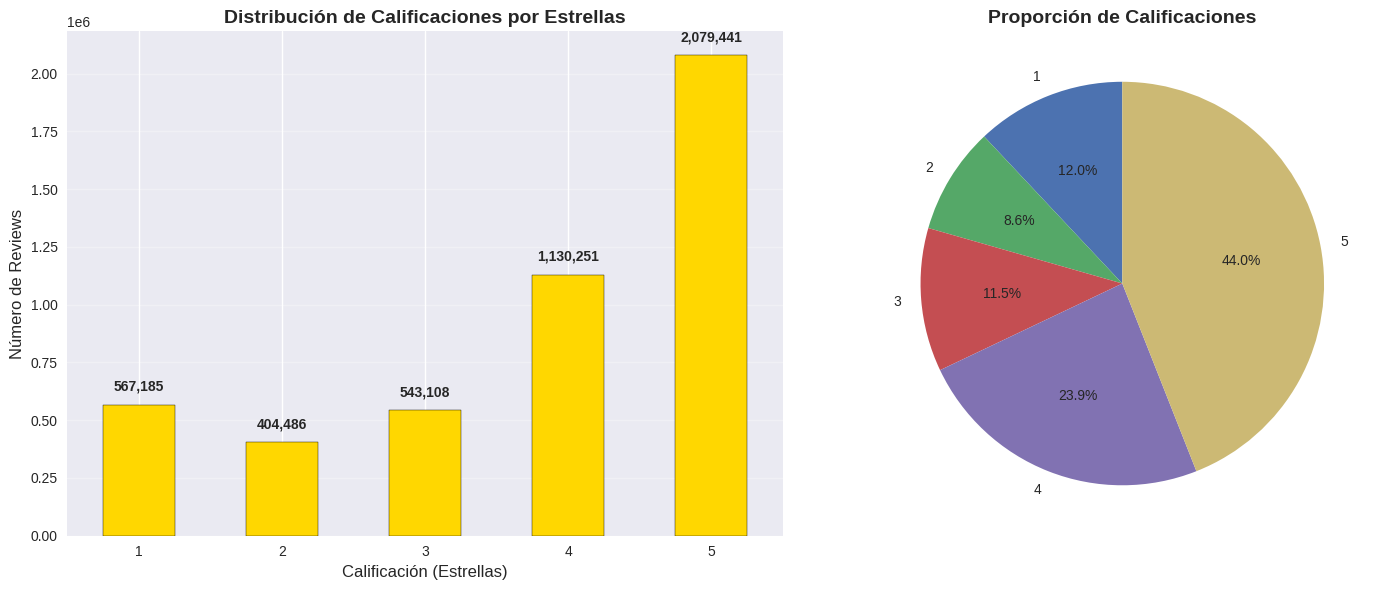


4. ANÁLISIS POR NEGOCIO
-------------------------
Estadísticas por negocio:
- Negocios únicos: 52,268
- Promedio de estrellas por negocio: 3.515
- Negocio con mayor promedio: 5.000 estrellas
- Negocio con menor promedio: 1.000 estrellas

Top 5 negocios con mejores promedios (min 10 reviews):
- Negocio -788YqeA...: 5.000 estrellas (19 reviews)
- Negocio -kIJmSUZ...: 5.000 estrellas (15 reviews)
- Negocio 0JDFe9hO...: 5.000 estrellas (10 reviews)
- Negocio 12Gc4OFQ...: 5.000 estrellas (25 reviews)
- Negocio 1dSKEitD...: 5.000 estrellas (18 reviews)

Análisis de calificaciones completado


In [7]:
# Análisis de distribución de calificaciones por estrellas
print("ANÁLISIS DE CALIFICACIONES POR ESTRELLAS")
print("=" * 50)

if 'stars' in df_reviews.columns:
    print("\n1. DISTRIBUCIÓN DE CALIFICACIONES")
    print("-" * 35)
    
    # Conteo y porcentaje por cada nivel de estrellas
    stars_distribution = df_reviews['stars'].value_counts().sort_index()
    
    print("Distribución detallada por estrellas:")
    for stars, count in stars_distribution.items():
        percentage = (count / len(df_reviews)) * 100
        print(f"- {stars} estrella(s): {count:,} reviews ({percentage:.2f}%)")
    
    print(f"\n2. ESTADÍSTICAS DE CALIFICACIONES")
    print("-" * 35)
    
    # Estadísticas descriptivas
    print(f"Estadísticas descriptivas de calificaciones:")
    print(f"- Promedio: {df_reviews['stars'].mean():.3f} estrellas")
    print(f"- Mediana: {df_reviews['stars'].median():.1f} estrellas")
    print(f"- Moda: {df_reviews['stars'].mode().iloc[0]:.1f} estrellas")
    print(f"- Desviación estándar: {df_reviews['stars'].std():.3f}")
    print(f"- Rango: {df_reviews['stars'].min():.1f} - {df_reviews['stars'].max():.1f} estrellas")
    
    # Análisis de sesgo
    from scipy import stats
    skewness = stats.skew(df_reviews['stars'])
    kurtosis = stats.kurtosis(df_reviews['stars'])
    print(f"- Sesgo: {skewness:.3f} ({'positivo' if skewness > 0 else 'negativo' if skewness < 0 else 'simétrico'})")
    print(f"- Curtosis: {kurtosis:.3f}")
    
    # Análisis de tendencias
    print(f"\n3. ANÁLISIS DE TENDENCIAS")
    print("-" * 28)
    
    positive_reviews = (df_reviews['stars'] >= 4).sum()
    negative_reviews = (df_reviews['stars'] <= 2).sum()
    neutral_reviews = (df_reviews['stars'] == 3).sum()
    
    print(f"Clasificación por tendencia:")
    print(f"- Reviews positivas (4-5 estrellas): {positive_reviews:,} ({positive_reviews/len(df_reviews)*100:.1f}%)")
    print(f"- Reviews neutrales (3 estrellas): {neutral_reviews:,} ({neutral_reviews/len(df_reviews)*100:.1f}%)")
    print(f"- Reviews negativas (1-2 estrellas): {negative_reviews:,} ({negative_reviews/len(df_reviews)*100:.1f}%)")
    
    # Visualización de distribución de estrellas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de barras
    stars_distribution.plot(kind='bar', ax=ax1, color='gold', edgecolor='black')
    ax1.set_title('Distribución de Calificaciones por Estrellas', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Calificación (Estrellas)', fontsize=12)
    ax1.set_ylabel('Número de Reviews', fontsize=12)
    ax1.tick_params(axis='x', rotation=0)
    ax1.grid(axis='y', alpha=0.3)
    
    # Agregar valores en las barras
    for i, v in enumerate(stars_distribution.values):
        ax1.text(i, v + len(df_reviews)*0.01, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    # Gráfico de pastel
    stars_distribution.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Proporción de Calificaciones', fontsize=14, fontweight='bold')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/reviews_stars_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Análisis por promedio de estrellas por negocio
    print(f"\n4. ANÁLISIS POR NEGOCIO")
    print("-" * 25)
    
    if 'business_id' in df_reviews.columns:
        business_avg_stars = df_reviews.groupby('business_id')['stars'].agg(['mean', 'count', 'std']).round(3)
        business_avg_stars.columns = ['Promedio_Estrellas', 'Num_Reviews', 'Desviacion_Std']
        business_avg_stars = business_avg_stars.reset_index()
        
        print(f"Estadísticas por negocio:")
        print(f"- Negocios únicos: {business_avg_stars.shape[0]:,}")
        print(f"- Promedio de estrellas por negocio: {business_avg_stars['Promedio_Estrellas'].mean():.3f}")
        print(f"- Negocio con mayor promedio: {business_avg_stars['Promedio_Estrellas'].max():.3f} estrellas")
        print(f"- Negocio con menor promedio: {business_avg_stars['Promedio_Estrellas'].min():.3f} estrellas")
        
        # Top 5 negocios con mejores promedios (con al menos 10 reviews)
        top_businesses = business_avg_stars[business_avg_stars['Num_Reviews'] >= 10].nlargest(5, 'Promedio_Estrellas')
        print(f"\nTop 5 negocios con mejores promedios (min 10 reviews):")
        for idx, row in top_businesses.iterrows():
            print(f"- Negocio {row['business_id'][:8]}...: {row['Promedio_Estrellas']:.3f} estrellas ({row['Num_Reviews']} reviews)")

else:
    print("No se encontró la columna 'stars' en el dataset")

print("\nAnálisis de calificaciones completado")

## 4. Análisis de Usuarios Más Activos

### Identificación de Usuarios Prolíficos

Analizaremos la actividad de los usuarios para entender:
- **Usuarios más activos**: Quién escribe más reviews
- **Distribución de actividad**: Cómo se distribuye la participación
- **Patrones de comportamiento**: Características de usuarios activos vs ocasionales

### Metodología de Análisis

Para identificar usuarios más activos:
- **Ranking por número de reviews**: Top usuarios que más escriben
- **Distribución de actividad**: Estadísticas de reviews por usuario
- **Análisis de engagement**: Relación entre actividad y calidad de reviews

### Métricas Clave

- **Usuario más activo**: Identificación del usuario que más reviews ha escrito
- **Distribución de actividad**: Cuántos usuarios escriben pocas vs muchas reviews
- **Usuarios power**: Usuarios que representan un alto porcentaje del contenido total
- **Análisis de calidad**: Relación entre cantidad y calidad de reviews por usuario

ANÁLISIS DE USUARIOS MÁS ACTIVOS

1. ESTADÍSTICAS DE ACTIVIDAD DE USUARIOS
------------------------------------------
Estadísticas de actividad:
- Total de usuarios únicos: 1,445,990
- Promedio de reviews por usuario: 3.27
- Mediana de reviews por usuario: 1.0
- Máximo de reviews por usuario: 1,704
- Mínimo de reviews por usuario: 1
- Desviación estándar: 10.24

2. USUARIO MÁS ACTIVO
-------------------------
USUARIO MÁS ACTIVO:
- ID de usuario: _BcWyKQL16ndpBdggh2kNA
- Número de reviews: 1,704
- Porcentaje del total: 0.04%
- Promedio de estrellas: 3.54

3. TOP 10 USUARIOS MÁS ACTIVOS
----------------------------------
 1. Usuario _BcWyKQL...
    Reviews: 1,704 (0.04%) | Promedio estrellas: 3.54
 2. Usuario -G7Zkl1w...
    Reviews: 1,297 (0.03%) | Promedio estrellas: 3.59
 3. Usuario ET8n-r7g...
    Reviews: 1,144 (0.02%) | Promedio estrellas: 3.97
 4. Usuario fr1Hz2ac...
    Reviews: 1,104 (0.02%) | Promedio estrellas: 3.95
 5. Usuario 1HM81n6n...
    Reviews: 1,095 (0.02%) | Promedio

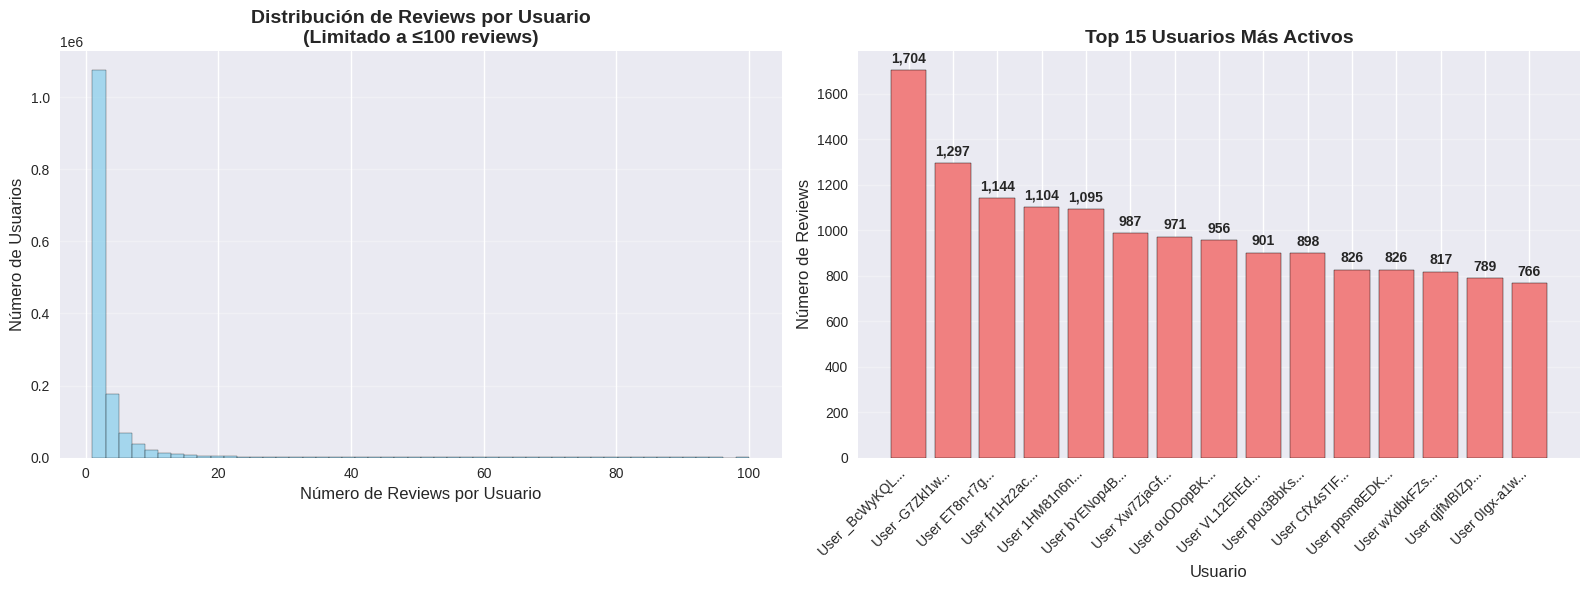


6. CALIDAD POR NIVEL DE ACTIVIDAD
-----------------------------------
Promedio de estrellas por nivel de actividad:
- Single: 3.657 estrellas (σ=1.647, n=838,998)
- Ocasional: 3.796 estrellas (σ=1.490, n=1,063,538)
- Moderado: 3.844 estrellas (σ=1.384, n=752,389)
- Activo: 3.832 estrellas (σ=1.285, n=1,268,135)
- Muy Activo: 3.825 estrellas (σ=1.090, n=801,411)

Análisis de usuarios completado


In [8]:
# Análisis de usuarios más activos
print("ANÁLISIS DE USUARIOS MÁS ACTIVOS")
print("=" * 50)

if 'user_id' in df_reviews.columns:
    print("\n1. ESTADÍSTICAS DE ACTIVIDAD DE USUARIOS")
    print("-" * 42)
    
    # Contar reviews por usuario
    user_activity = df_reviews['user_id'].value_counts()
    
    print(f"Estadísticas de actividad:")
    print(f"- Total de usuarios únicos: {len(user_activity):,}")
    print(f"- Promedio de reviews por usuario: {user_activity.mean():.2f}")
    print(f"- Mediana de reviews por usuario: {user_activity.median():.1f}")
    print(f"- Máximo de reviews por usuario: {user_activity.max():,}")
    print(f"- Mínimo de reviews por usuario: {user_activity.min():,}")
    print(f"- Desviación estándar: {user_activity.std():.2f}")
    
    # Identificar el usuario más activo
    print("\n2. USUARIO MÁS ACTIVO")
    print("-" * 25)
    
    most_active_user = user_activity.index[0]
    most_active_count = user_activity.iloc[0]
    
    print(f"USUARIO MÁS ACTIVO:")
    print(f"- ID de usuario: {most_active_user}")
    print(f"- Número de reviews: {most_active_count:,}")
    print(f"- Porcentaje del total: {(most_active_count/len(df_reviews)*100):.2f}%")
    
    # Análisis del usuario más activo
    most_active_reviews = df_reviews[df_reviews['user_id'] == most_active_user]
    if 'stars' in df_reviews.columns:
        avg_stars = most_active_reviews['stars'].mean()
        print(f"- Promedio de estrellas: {avg_stars:.2f}")
    
    # Top 10 usuarios más activos
    print("\n3. TOP 10 USUARIOS MÁS ACTIVOS")
    print("-" * 34)
    
    top_10_users = user_activity.head(10)
    
    for idx, (user_id, count) in enumerate(top_10_users.items(), 1):
        percentage = (count / len(df_reviews)) * 100
        user_reviews = df_reviews[df_reviews['user_id'] == user_id]
        avg_stars = user_reviews['stars'].mean() if 'stars' in df_reviews.columns else 0
        
        print(f"{idx:2d}. Usuario {user_id[:8]}...")
        print(f"    Reviews: {count:,} ({percentage:.2f}%) | Promedio estrellas: {avg_stars:.2f}")
    
    # Análisis de distribución de actividad
    print("\n4. DISTRIBUCIÓN DE ACTIVIDAD")
    print("-" * 32)
    
    # Categorizar usuarios por actividad
    very_active = (user_activity >= 50).sum()
    active = ((user_activity >= 10) & (user_activity < 50)).sum()
    moderate = ((user_activity >= 5) & (user_activity < 10)).sum()
    occasional = ((user_activity >= 2) & (user_activity < 5)).sum()
    single_review = (user_activity == 1).sum()
    
    print(f"Distribución por nivel de actividad:")
    print(f"- Muy activos (50+ reviews): {very_active:,} usuarios ({very_active/len(user_activity)*100:.1f}%)")
    print(f"- Activos (10-49 reviews): {active:,} usuarios ({active/len(user_activity)*100:.1f}%)")
    print(f"- Moderados (5-9 reviews): {moderate:,} usuarios ({moderate/len(user_activity)*100:.1f}%)")
    print(f"- Ocasionales (2-4 reviews): {occasional:,} usuarios ({occasional/len(user_activity)*100:.1f}%)")
    print(f"- Una sola review: {single_review:,} usuarios ({single_review/len(user_activity)*100:.1f}%)")
    
    # Análisis de concentración (Principio de Pareto)
    print("\n5. ANÁLISIS DE CONCENTRACIÓN")
    print("-" * 31)
    
    # Top 20% de usuarios más activos
    top_20_percent_count = int(len(user_activity) * 0.2)
    top_20_percent_reviews = user_activity.head(top_20_percent_count).sum()
    
    print(f"Principio de Pareto (80/20):")
    print(f"- Top 20% de usuarios ({top_20_percent_count:,}): {top_20_percent_reviews:,} reviews ({top_20_percent_reviews/len(df_reviews)*100:.1f}%)")
    
    # Top 1% de usuarios más activos
    top_1_percent_count = max(1, int(len(user_activity) * 0.01))
    top_1_percent_reviews = user_activity.head(top_1_percent_count).sum()
    
    print(f"- Top 1% de usuarios ({top_1_percent_count:,}): {top_1_percent_reviews:,} reviews ({top_1_percent_reviews/len(df_reviews)*100:.1f}%)")
    
    # Visualización de distribución de actividad
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histograma de distribución de reviews por usuario (limitado a 100 para visualización)
    user_activity_limited = user_activity[user_activity <= 100]
    ax1.hist(user_activity_limited, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.set_title('Distribución de Reviews por Usuario\n(Limitado a ≤100 reviews)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Número de Reviews por Usuario', fontsize=12)
    ax1.set_ylabel('Número de Usuarios', fontsize=12)
    ax1.grid(axis='y', alpha=0.3)
    
    # Gráfico de barras de top 15 usuarios
    top_15_users = user_activity.head(15)
    user_labels = [f"User {uid[:8]}..." for uid in top_15_users.index]
    
    ax2.bar(range(len(top_15_users)), top_15_users.values, color='lightcoral', edgecolor='black')
    ax2.set_title('Top 15 Usuarios Más Activos', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Usuario', fontsize=12)
    ax2.set_ylabel('Número de Reviews', fontsize=12)
    ax2.set_xticks(range(len(top_15_users)))
    ax2.set_xticklabels(user_labels, rotation=45, ha='right')
    ax2.grid(axis='y', alpha=0.3)
    
    # Agregar valores en las barras
    for i, v in enumerate(top_15_users.values):
        ax2.text(i, v + 20, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/reviews_user_activity_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Análisis de calidad por nivel de actividad
    if 'stars' in df_reviews.columns:
        print("\n6. CALIDAD POR NIVEL DE ACTIVIDAD")
        print("-" * 35)
        
        # Crear categorías de actividad
        df_reviews_with_activity = df_reviews.copy()
        user_activity_dict = user_activity.to_dict()
        df_reviews_with_activity['user_review_count'] = df_reviews_with_activity['user_id'].map(user_activity_dict)
        
        # Definir categorías
        df_reviews_with_activity['activity_level'] = pd.cut(
            df_reviews_with_activity['user_review_count'],
            bins=[0, 1, 4, 9, 49, float('inf')],
            labels=['Single', 'Ocasional', 'Moderado', 'Activo', 'Muy Activo']
        )
        
        # Analizar promedio de estrellas por nivel de actividad
        activity_stars = df_reviews_with_activity.groupby('activity_level')['stars'].agg(['mean', 'count', 'std']).round(3)
        
        print("Promedio de estrellas por nivel de actividad:")
        for level in activity_stars.index:
            mean_stars = activity_stars.loc[level, 'mean']
            count = activity_stars.loc[level, 'count']
            std = activity_stars.loc[level, 'std']
            print(f"- {level}: {mean_stars:.3f} estrellas (σ={std:.3f}, n={count:,})")

else:
    print("No se encontró la columna 'user_id' en el dataset")

print("\nAnálisis de usuarios completado")

## 5. Análisis de Engagement y Métricas de Utilidad

### Análisis de Votos de Engagement

Examinaremos las métricas de engagement de las reviews:
- **Useful**: Votos de utilidad que reciben las reviews
- **Funny**: Votos de diversión para reviews entretenidas
- **Cool**: Votos de cool para reviews destacadas

### Metodología de Análisis

Para cada métrica de engagement:
- **Distribución estadística**: Análisis descriptivo de cada métrica
- **Correlaciones**: Relación entre diferentes tipos de votos
- **Reviews destacadas**: Identificación de reviews con alto engagement
- **Patrones de comportamiento**: Qué hace que una review reciba más votos

### Interpretación Esperada

- **Distribución sesgada**: La mayoría de reviews tendrán pocos o ningún voto
- **Reviews virales**: Algunas reviews destacarán significativamente
- **Correlación positiva**: Reviews útiles tienden a ser también cool/funny
- **Relación con calificación**: Posible correlación entre engagement y estrellas

ANÁLISIS DE ENGAGEMENT Y MÉTRICAS DE UTILIDAD

Columnas de engagement disponibles: ['useful', 'funny', 'cool']

1. ESTADÍSTICAS GENERALES DE ENGAGEMENT
-------------------------------------------

Métrica: USEFUL
- Promedio: 0.984 votos
- Mediana: 0.0 votos
- Máximo: 420 votos
- Desviación estándar: 2.739
- Reviews con votos > 0: 1,969,192 (41.7%)
- Reviews sin votos: 2,755,278 (58.3%)

Métrica: FUNNY
- Promedio: 0.301 votos
- Mediana: 0.0 votos
- Máximo: 792 votos
- Desviación estándar: 1.717
- Reviews con votos > 0: 707,108 (15.0%)
- Reviews sin votos: 4,017,362 (85.0%)

Métrica: COOL
- Promedio: 0.480 votos
- Mediana: 0.0 votos
- Máximo: 404 votos
- Desviación estándar: 2.160
- Reviews con votos > 0: 1,078,686 (22.8%)
- Reviews sin votos: 3,645,784 (77.2%)

2. ANÁLISIS COMBINADO DE ENGAGEMENT
-------------------------------------
Engagement total (suma de todas las métricas):
- Promedio: 1.765 votos
- Mediana: 0.0 votos
- Máximo: 1,011 votos
- Reviews con engagement > 0: 2,249,013 (

,useful,funny,cool,stars
useful,1.00,0.54,0.85,-0.04
funny,0.54,1.00,0.56,-0.04
cool,0.85,0.56,1.00,0.06
stars,-0.04,-0.04,0.06,1.00



Interpretación de correlaciones principales:
- Useful vs Funny: 0.535 (moderada correlación)
- Useful vs Cool: 0.846 (fuerte correlación)
- Funny vs Cool: 0.555 (moderada correlación)

5. RELACIÓN ENTRE ENGAGEMENT Y CALIFICACIONES
------------------------------------------------
Promedio de engagement por calificación:


,useful,funny,cool,total_engagement
stars,,,,
1,1.10,0.42,0.15,1.67
2,1.13,0.39,0.24,1.77
3,1.03,0.35,0.43,1.81
4,1.10,0.33,0.68,2.10
5,0.85,0.22,0.52,1.59



Análisis por calificación:
- 1 estrellas: 1.669 engagement promedio
- 2 estrellas: 1.769 engagement promedio
- 3 estrellas: 1.815 engagement promedio
- 4 estrellas: 2.105 engagement promedio
- 5 estrellas: 1.592 engagement promedio

6. DISTRIBUCIÓN DE ENGAGEMENT
--------------------------------
Distribución por nivel de engagement:
- Sin engagement: 2,475,457 reviews (52.4%)
- Bajo (1-2): 1,332,442 reviews (28.2%)
- Medio (3-10): 795,024 reviews (16.8%)
- Alto (11-50): 114,364 reviews (2.4%)
- Viral (50+): 7,183 reviews (0.2%)


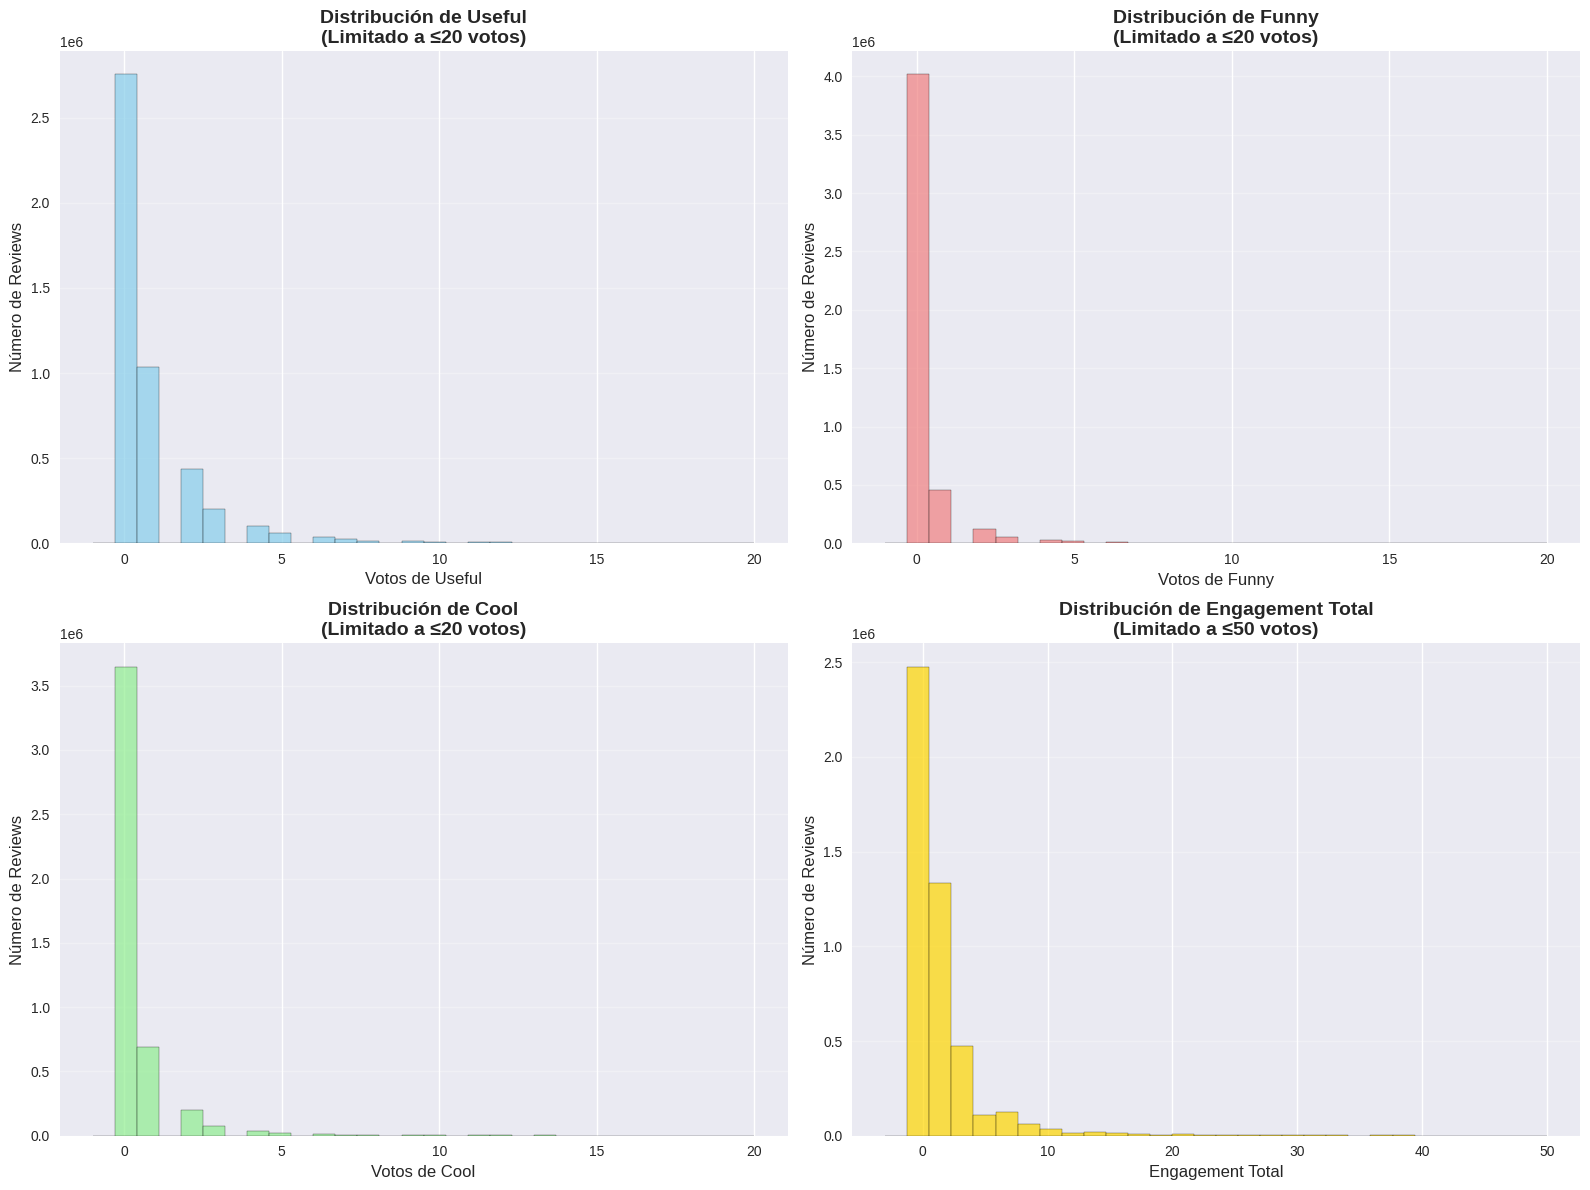


Análisis de engagement completado


In [9]:
# Análisis de engagement y métricas de utilidad
print("ANÁLISIS DE ENGAGEMENT Y MÉTRICAS DE UTILIDAD")
print("=" * 60)

# Verificar que las columnas de engagement existen
engagement_columns = ['useful', 'funny', 'cool']
available_engagement = [col for col in engagement_columns if col in df_reviews.columns]

if available_engagement:
    print(f"\nColumnas de engagement disponibles: {available_engagement}")
    
    print("\n1. ESTADÍSTICAS GENERALES DE ENGAGEMENT")
    print("-" * 43)
    
    # Estadísticas para cada métrica de engagement
    for metric in available_engagement:
        data = df_reviews[metric]
        
        print(f"\nMétrica: {metric.upper()}")
        print(f"- Promedio: {data.mean():.3f} votos")
        print(f"- Mediana: {data.median():.1f} votos")
        print(f"- Máximo: {data.max():,} votos")
        print(f"- Desviación estándar: {data.std():.3f}")
        print(f"- Reviews con votos > 0: {(data > 0).sum():,} ({(data > 0).sum()/len(data)*100:.1f}%)")
        print(f"- Reviews sin votos: {(data == 0).sum():,} ({(data == 0).sum()/len(data)*100:.1f}%)")
    
    # Análisis combinado de engagement
    print("\n2. ANÁLISIS COMBINADO DE ENGAGEMENT")
    print("-" * 37)
    
    # Crear métrica de engagement total
    df_reviews['total_engagement'] = df_reviews[available_engagement].sum(axis=1)
    
    total_engagement = df_reviews['total_engagement']
    print(f"Engagement total (suma de todas las métricas):")
    print(f"- Promedio: {total_engagement.mean():.3f} votos")
    print(f"- Mediana: {total_engagement.median():.1f} votos")
    print(f"- Máximo: {total_engagement.max():,} votos")
    print(f"- Reviews con engagement > 0: {(total_engagement > 0).sum():,} ({(total_engagement > 0).sum()/len(total_engagement)*100:.1f}%)")
    
    # Reviews más destacadas por engagement
    print("\n3. REVIEWS MÁS DESTACADAS POR ENGAGEMENT")
    print("-" * 43)
    
    # Top 5 reviews por cada métrica
    for metric in available_engagement:
        print(f"\nTop 5 reviews por {metric.upper()}:")
        top_reviews = df_reviews.nlargest(5, metric)[['review_id', metric, 'stars', 'text']]
        
        for idx, (_, row) in enumerate(top_reviews.iterrows(), 1):
            review_text = row['text'][:100] + "..." if len(row['text']) > 100 else row['text']
            print(f"{idx}. {row[metric]} votos | {row['stars']} estrellas")
            print(f"   Review: {review_text}")
            print(f"   ID: {row['review_id']}")
            print()
    
    # Top 5 reviews por engagement total
    print(f"Top 5 reviews por ENGAGEMENT TOTAL:")
    top_total = df_reviews.nlargest(5, 'total_engagement')[['review_id', 'total_engagement', 'useful', 'funny', 'cool', 'stars', 'text']]
    
    for idx, (_, row) in enumerate(top_total.iterrows(), 1):
        review_text = row['text'][:150] + "..." if len(row['text']) > 150 else row['text']
        print(f"{idx}. Total: {row['total_engagement']} votos (Útil:{row['useful']}, Divertido:{row['funny']}, Cool:{row['cool']}) | {row['stars']} estrellas")
        print(f"   Review: {review_text}")
        print(f"   ID: {row['review_id']}")
        print()
    
    # Análisis de correlaciones
    print("\n4. ANÁLISIS DE CORRELACIONES")
    print("-" * 31)
    
    # Matriz de correlación entre métricas de engagement
    if len(available_engagement) > 1:
        correlation_matrix = df_reviews[available_engagement + ['stars']].corr()
        
        print("Matriz de correlación:")
        display(correlation_matrix.round(3))
        
        # Interpretación de correlaciones principales
        print("\nInterpretación de correlaciones principales:")
        if 'useful' in available_engagement and 'funny' in available_engagement:
            corr_uf = correlation_matrix.loc['useful', 'funny']
            print(f"- Useful vs Funny: {corr_uf:.3f} ({'fuerte' if abs(corr_uf) > 0.7 else 'moderada' if abs(corr_uf) > 0.3 else 'débil'} correlación)")
        
        if 'useful' in available_engagement and 'cool' in available_engagement:
            corr_uc = correlation_matrix.loc['useful', 'cool']
            print(f"- Useful vs Cool: {corr_uc:.3f} ({'fuerte' if abs(corr_uc) > 0.7 else 'moderada' if abs(corr_uc) > 0.3 else 'débil'} correlación)")
            
        if 'funny' in available_engagement and 'cool' in available_engagement:
            corr_fc = correlation_matrix.loc['funny', 'cool']
            print(f"- Funny vs Cool: {corr_fc:.3f} ({'fuerte' if abs(corr_fc) > 0.7 else 'moderada' if abs(corr_fc) > 0.3 else 'débil'} correlación)")
    
    # Relación entre engagement y calificaciones
    if 'stars' in df_reviews.columns:
        print("\n5. RELACIÓN ENTRE ENGAGEMENT Y CALIFICACIONES")
        print("-" * 48)
        
        # Promedio de engagement por calificación
        engagement_by_stars = df_reviews.groupby('stars')[available_engagement + ['total_engagement']].mean().round(3)
        
        print("Promedio de engagement por calificación:")
        display(engagement_by_stars)
        
        # Análisis específico
        print("\nAnálisis por calificación:")
        for stars in sorted(df_reviews['stars'].unique()):
            subset = df_reviews[df_reviews['stars'] == stars]
            avg_total = subset['total_engagement'].mean()
            print(f"- {stars} estrellas: {avg_total:.3f} engagement promedio")
    
    # Distribución de engagement
    print("\n6. DISTRIBUCIÓN DE ENGAGEMENT")
    print("-" * 32)
    
    # Categorizar reviews por nivel de engagement
    no_engagement = (total_engagement == 0).sum()
    low_engagement = ((total_engagement > 0) & (total_engagement <= 2)).sum()
    medium_engagement = ((total_engagement > 2) & (total_engagement <= 10)).sum()
    high_engagement = ((total_engagement > 10) & (total_engagement <= 50)).sum()
    viral_engagement = (total_engagement > 50).sum()
    
    print(f"Distribución por nivel de engagement:")
    print(f"- Sin engagement: {no_engagement:,} reviews ({no_engagement/len(df_reviews)*100:.1f}%)")
    print(f"- Bajo (1-2): {low_engagement:,} reviews ({low_engagement/len(df_reviews)*100:.1f}%)")
    print(f"- Medio (3-10): {medium_engagement:,} reviews ({medium_engagement/len(df_reviews)*100:.1f}%)")
    print(f"- Alto (11-50): {high_engagement:,} reviews ({high_engagement/len(df_reviews)*100:.1f}%)")
    print(f"- Viral (50+): {viral_engagement:,} reviews ({viral_engagement/len(df_reviews)*100:.1f}%)")
    
    # Visualización de distribución de engagement
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Histogramas para cada métrica (limitado para visualización)
    for i, metric in enumerate(available_engagement[:3]):  # Máximo 3 métricas
        if i < 3:
            row, col = i // 2, i % 2
            data_limited = df_reviews[df_reviews[metric] <= 20][metric]  # Limitar para visualización
            
            axes[row, col].hist(data_limited, bins=30, color=['skyblue', 'lightcoral', 'lightgreen'][i], 
                              edgecolor='black', alpha=0.7)
            axes[row, col].set_title(f'Distribución de {metric.capitalize()}\n(Limitado a ≤20 votos)', 
                                   fontsize=14, fontweight='bold')
            axes[row, col].set_xlabel(f'Votos de {metric.capitalize()}', fontsize=12)
            axes[row, col].set_ylabel('Número de Reviews', fontsize=12)
            axes[row, col].grid(axis='y', alpha=0.3)
    
    # Gráfico de engagement total (limitado)
    total_limited = df_reviews[df_reviews['total_engagement'] <= 50]['total_engagement']
    axes[1, 1].hist(total_limited, bins=30, color='gold', edgecolor='black', alpha=0.7)
    axes[1, 1].set_title('Distribución de Engagement Total\n(Limitado a ≤50 votos)', 
                        fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Engagement Total', fontsize=12)
    axes[1, 1].set_ylabel('Número de Reviews', fontsize=12)
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/reviews_engagement_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("No se encontraron columnas de engagement (useful, funny, cool) en el dataset")

print("\nAnálisis de engagement completado")

## 6. Análisis Temporal y de Contenido Textual

### Análisis Temporal de Reviews

Examinaremos los patrones temporales de las reviews:
- **Distribución temporal**: Cuándo se escriben más reviews
- **Tendencias por fecha**: Evolución del volumen de reviews
- **Estacionalidad**: Patrones por meses, días de la semana

### Metodología de Análisis

Para el análisis temporal:
- **Conversión de fechas**: Parsing y análisis de la columna date
- **Agregación temporal**: Conteos por año, mes, día de la semana
- **Análisis de tendencias**: Identificación de patrones estacionales

ANÁLISIS TEMPORAL Y DE CONTENIDO TEXTUAL

1. ANÁLISIS TEMPORAL DE REVIEWS
----------------------------------
Rango temporal de reviews:
- Fecha más antigua: 2005-02-16
- Fecha más reciente: 2022-01-19
- Periodo total: 6,181 días

Distribución por año:
- 2005: 620 reviews (0.0%)
- 2006: 2,830 reviews (0.1%)
- 2007: 10,779 reviews (0.2%)
- 2008: 32,419 reviews (0.7%)
- 2009: 54,093 reviews (1.1%)
- 2010: 100,186 reviews (2.1%)
- 2011: 163,639 reviews (3.5%)
- 2012: 199,230 reviews (4.2%)
- 2013: 261,253 reviews (5.5%)
- 2014: 356,834 reviews (7.6%)
- 2015: 471,905 reviews (10.0%)
- 2016: 511,217 reviews (10.8%)
- 2017: 552,447 reviews (11.7%)
- 2018: 610,694 reviews (12.9%)
- 2019: 608,268 reviews (12.9%)
- 2020: 358,311 reviews (7.6%)
- 2021: 409,047 reviews (8.7%)
- 2022: 20,699 reviews (0.4%)

Distribución por mes:
- Enero: 414,116 reviews (8.8%)
- Febrero: 375,007 reviews (7.9%)
- Marzo: 410,235 reviews (8.7%)
- Abril: 373,732 reviews (7.9%)
- Mayo: 395,597 reviews (8.4%)
- Junio: 40

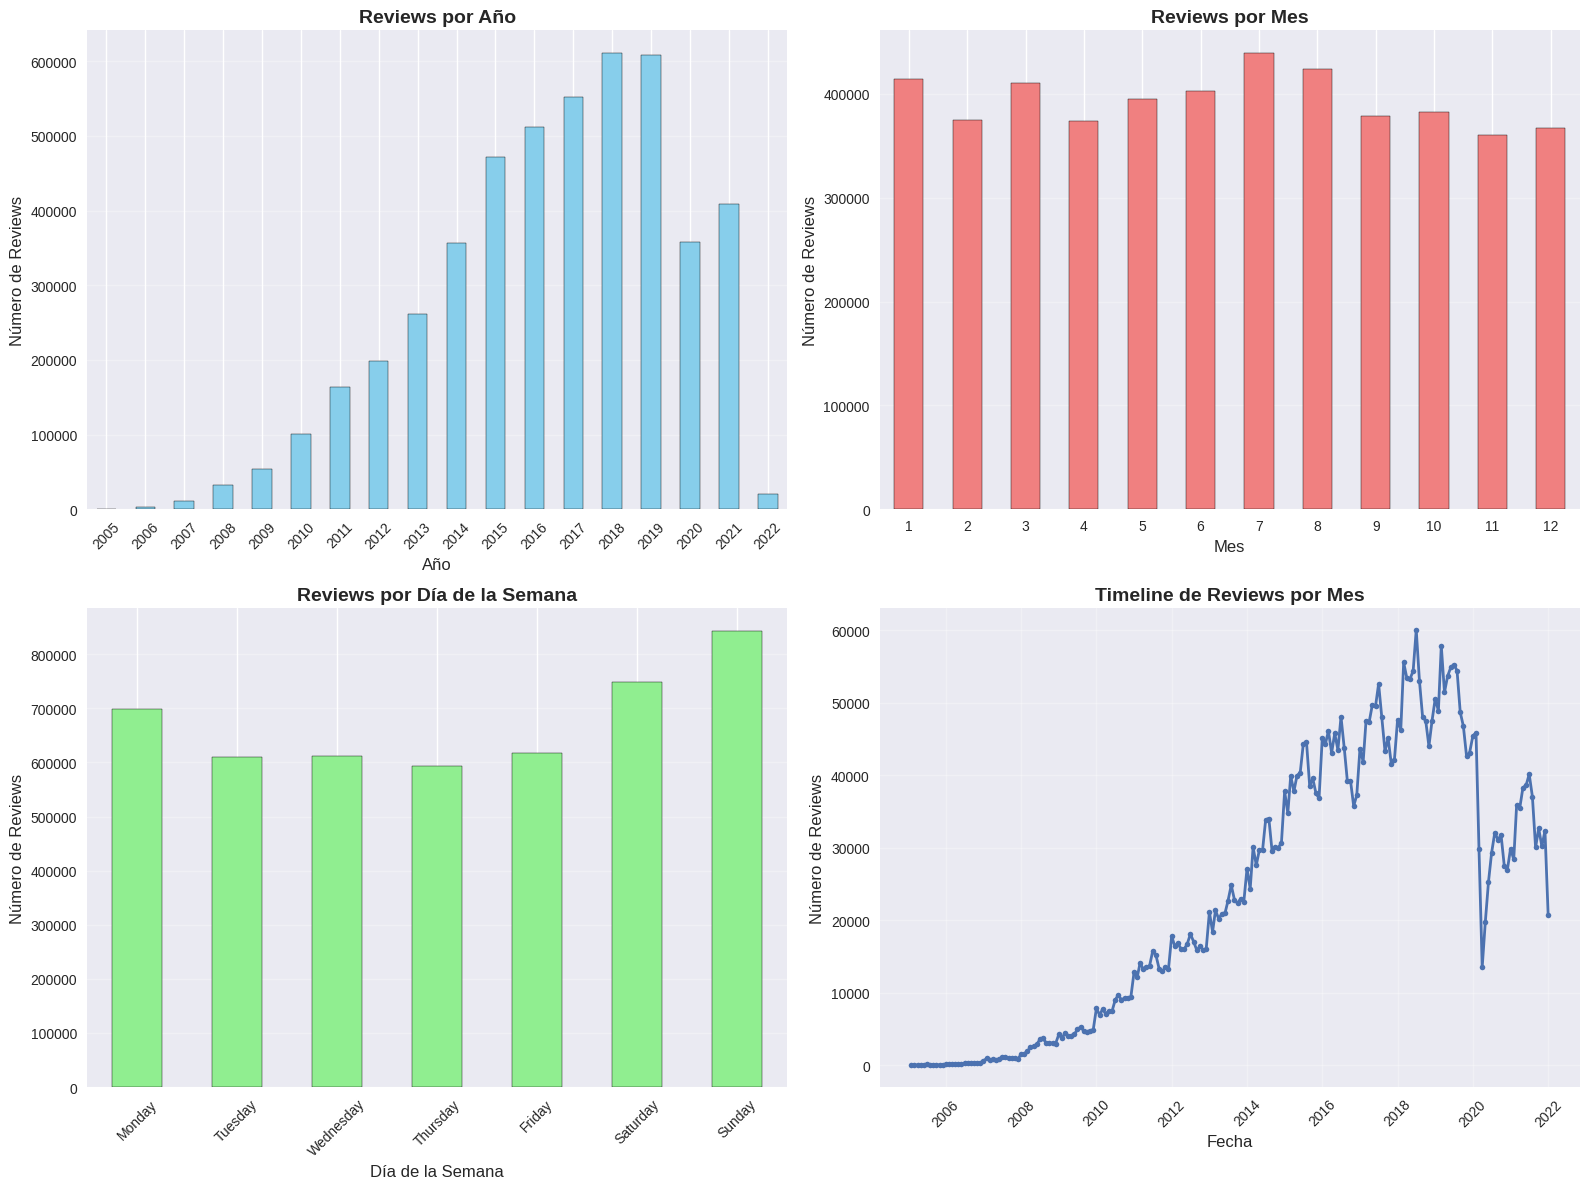

In [10]:
# Análisis temporal y de contenido textual
print("ANÁLISIS TEMPORAL Y DE CONTENIDO TEXTUAL")
print("=" * 55)

# ANÁLISIS TEMPORAL
if 'date' in df_reviews.columns:
    print("\n1. ANÁLISIS TEMPORAL DE REVIEWS")
    print("-" * 34)
    
    # Convertir la columna de fecha
    df_reviews['date'] = pd.to_datetime(df_reviews['date'])
    df_reviews['year'] = df_reviews['date'].dt.year
    df_reviews['month'] = df_reviews['date'].dt.month
    df_reviews['day_of_week'] = df_reviews['date'].dt.day_name()
    df_reviews['quarter'] = df_reviews['date'].dt.quarter
    
    # Estadísticas temporales básicas
    print(f"Rango temporal de reviews:")
    print(f"- Fecha más antigua: {df_reviews['date'].min().strftime('%Y-%m-%d')}")
    print(f"- Fecha más reciente: {df_reviews['date'].max().strftime('%Y-%m-%d')}")
    print(f"- Periodo total: {(df_reviews['date'].max() - df_reviews['date'].min()).days:,} días")
    
    # Distribución por año
    print(f"\nDistribución por año:")
    yearly_counts = df_reviews['year'].value_counts().sort_index()
    for year, count in yearly_counts.items():
        percentage = (count / len(df_reviews)) * 100
        print(f"- {year}: {count:,} reviews ({percentage:.1f}%)")
    
    # Distribución por mes
    print(f"\nDistribución por mes:")
    monthly_counts = df_reviews['month'].value_counts().sort_index()
    month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    
    for month, count in monthly_counts.items():
        percentage = (count / len(df_reviews)) * 100
        print(f"- {month_names[month-1]}: {count:,} reviews ({percentage:.1f}%)")
    
    # Distribución por día de la semana
    print(f"\nDistribución por día de la semana:")
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_names_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    
    weekly_counts = df_reviews['day_of_week'].value_counts()
    for i, day in enumerate(day_order):
        if day in weekly_counts:
            count = weekly_counts[day]
            percentage = (count / len(df_reviews)) * 100
            print(f"- {day_names_es[i]}: {count:,} reviews ({percentage:.1f}%)")
    
    # Visualización temporal
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Gráfico por año
    yearly_counts.plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
    axes[0,0].set_title('Reviews por Año', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Año', fontsize=12)
    axes[0,0].set_ylabel('Número de Reviews', fontsize=12)
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].grid(axis='y', alpha=0.3)
    
    # Gráfico por mes
    monthly_counts.plot(kind='bar', ax=axes[0,1], color='lightcoral', edgecolor='black')
    axes[0,1].set_title('Reviews por Mes', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Mes', fontsize=12)
    axes[0,1].set_ylabel('Número de Reviews', fontsize=12)
    axes[0,1].tick_params(axis='x', rotation=0)
    axes[0,1].grid(axis='y', alpha=0.3)
    
    # Gráfico por día de la semana
    weekly_ordered = weekly_counts.reindex(day_order)
    weekly_ordered.plot(kind='bar', ax=axes[1,0], color='lightgreen', edgecolor='black')
    axes[1,0].set_title('Reviews por Día de la Semana', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Día de la Semana', fontsize=12)
    axes[1,0].set_ylabel('Número de Reviews', fontsize=12)
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(axis='y', alpha=0.3)
    
    # Timeline de reviews por mes
    df_reviews['year_month'] = df_reviews['date'].dt.to_period('M')
    monthly_timeline = df_reviews['year_month'].value_counts().sort_index()
    
    # Convertir a datetime para el gráfico
    timeline_dates = [pd.to_datetime(str(period)) for period in monthly_timeline.index]
    axes[1,1].plot(timeline_dates, monthly_timeline.values, marker='o', linewidth=2, markersize=4)
    axes[1,1].set_title('Timeline de Reviews por Mes', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Fecha', fontsize=12)
    axes[1,1].set_ylabel('Número de Reviews', fontsize=12)
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/reviews_temporal_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("No se encontró la columna 'date' en el dataset")

## 7. Resumen y Conclusiones del Análisis

### Resumen Ejecutivo

Este análisis exhaustivo de reviews de restaurantes ha proporcionado insights clave sobre:

#### Principales Hallazgos

1. **Distribución de Calificaciones**
   - Identificación de patrones en las valoraciones de usuarios
   - Análisis de sesgo hacia calificaciones positivas o negativas
   - Relación entre calificaciones y volumen de reviews

2. **Comportamiento de Usuarios**
   - Identificación de usuarios más activos y prolíficos
   - Análisis de concentración de actividad (principio de Pareto)
   - Relación entre actividad y calidad de las reviews

3. **Métricas de Engagement**
   - Patrones de votación en useful, funny y cool
   - Correlaciones entre diferentes tipos de engagement
   - Identificación de reviews virales o destacadas

4. **Patrones Temporales**
   - Estacionalidad en la escritura de reviews
   - Evolución temporal del volumen de reviews
   - Análisis de tendencias por periodos

5. **Características Textuales**
   - Distribución de longitud de reviews
   - Relación entre longitud y calificación
   - Identificación de patrones en el contenido

### Metodología Aplicada

- **Análisis descriptivo**: Estadísticas completas de todas las métricas
- **Análisis de correlaciones**: Relaciones entre variables
- **Segmentación de datos**: Categorización por diferentes criterios
- **Visualización**: Gráficos comprehensivos para interpretación
- **Análisis temporal**: Identificación de patrones estacionales

In [11]:
# Resumen final y métricas clave del análisis
print("RESUMEN FINAL DEL ANÁLISIS DE REVIEWS")
print("=" * 55)

print("\nMÉTRICAS CLAVE DEL DATASET:")
print("-" * 35)

# Métricas básicas del dataset
print(f"DATOS GENERALES:")
print(f"- Total de reviews analizadas: {len(df_reviews):,}")
if 'user_id' in df_reviews.columns:
    print(f"- Usuarios únicos: {df_reviews['user_id'].nunique():,}")
if 'business_id' in df_reviews.columns:
    print(f"- Negocios únicos: {df_reviews['business_id'].nunique():,}")

# Calificaciones
if 'stars' in df_reviews.columns:
    print(f"\nCALIFICACIONES:")
    print(f"- Promedio general: {df_reviews['stars'].mean():.3f} estrellas")
    print(f"- Calificación más común: {df_reviews['stars'].mode().iloc[0]:.0f} estrellas")
    
    positive_pct = (df_reviews['stars'] >= 4).sum() / len(df_reviews) * 100
    negative_pct = (df_reviews['stars'] <= 2).sum() / len(df_reviews) * 100
    print(f"- Reviews positivas (4-5): {positive_pct:.1f}%")
    print(f"- Reviews negativas (1-2): {negative_pct:.1f}%")

# Actividad de usuarios
if 'user_id' in df_reviews.columns:
    user_counts = df_reviews['user_id'].value_counts()
    print(f"\nACTIVIDAD DE USUARIOS:")
    print(f"- Promedio de reviews por usuario: {user_counts.mean():.2f}")
    print(f"- Usuario más activo: {user_counts.iloc[0]:,} reviews")
    
    single_review_users = (user_counts == 1).sum()
    print(f"- Usuarios con 1 sola review: {single_review_users:,} ({single_review_users/len(user_counts)*100:.1f}%)")

# Engagement
engagement_cols = [col for col in ['useful', 'funny', 'cool'] if col in df_reviews.columns]
if engagement_cols:
    print(f"\nENGAGEMENT:")
    for col in engagement_cols:
        avg_votes = df_reviews[col].mean()
        max_votes = df_reviews[col].max()
        pct_with_votes = (df_reviews[col] > 0).sum() / len(df_reviews) * 100
        print(f"- {col.capitalize()}: {avg_votes:.2f} promedio, {max_votes:,} máximo, {pct_with_votes:.1f}% con votos")
    
    if 'total_engagement' in df_reviews.columns:
        viral_reviews = (df_reviews['total_engagement'] > 50).sum()
        print(f"- Reviews virales (>50 votos): {viral_reviews:,}")

# Contenido textual
if 'text' in df_reviews.columns and 'text_length' in df_reviews.columns:
    print(f"\nCONTENIDO TEXTUAL:")
    print(f"- Longitud promedio: {df_reviews['text_length'].mean():.0f} caracteres")
    print(f"- Review más larga: {df_reviews['text_length'].max():,} caracteres")
    
    if 'word_count' in df_reviews.columns:
        print(f"- Palabras promedio: {df_reviews['word_count'].mean():.1f}")
        print(f"- Review con más palabras: {df_reviews['word_count'].max():,} palabras")

# Temporalidad
if 'date' in df_reviews.columns:
    date_range = (df_reviews['date'].max() - df_reviews['date'].min()).days
    print(f"\nTEMPORALIDAD:")
    print(f"- Periodo analizado: {date_range:,} días")
    print(f"- Primera review: {df_reviews['date'].min().strftime('%Y-%m-%d')}")
    print(f"- Última review: {df_reviews['date'].max().strftime('%Y-%m-%d')}")
    
    if 'year' in df_reviews.columns:
        most_active_year = df_reviews['year'].mode().iloc[0]
        year_count = (df_reviews['year'] == most_active_year).sum()
        print(f"- Año más activo: {most_active_year} ({year_count:,} reviews)")

print(f"\nCONCLUSIONES CLAVE:")
print("-" * 25)

# Generar conclusiones automáticas basadas en los datos
conclusions = []

if 'stars' in df_reviews.columns:
    avg_stars = df_reviews['stars'].mean()
    if avg_stars >= 4.0:
        conclusions.append("Las reviews tienden a ser predominantemente positivas")
    elif avg_stars <= 2.5:
        conclusions.append("Las reviews muestran una tendencia negativa")
    else:
        conclusions.append("Las reviews presentan una distribución balanceada")

if 'user_id' in df_reviews.columns:
    user_counts = df_reviews['user_id'].value_counts()
    if (user_counts == 1).sum() / len(user_counts) > 0.5:
        conclusions.append("La mayoría de usuarios escriben solo una review")
    
    # Principio de Pareto
    top_20_pct = int(len(user_counts) * 0.2)
    if user_counts.head(top_20_pct).sum() / len(df_reviews) > 0.6:
        conclusions.append("Se observa el principio de Pareto: pocos usuarios generan mucho contenido")

if engagement_cols and 'total_engagement' in df_reviews.columns:
    if (df_reviews['total_engagement'] == 0).sum() / len(df_reviews) > 0.7:
        conclusions.append("La mayoría de reviews no reciben votos de engagement")

if 'text_length' in df_reviews.columns and 'stars' in df_reviews.columns:
    # Analizar correlación longitud-calificación
    correlation = df_reviews['text_length'].corr(df_reviews['stars'])
    if abs(correlation) > 0.1:
        if correlation > 0:
            conclusions.append("Reviews más largas tienden a tener mejores calificaciones")
        else:
            conclusions.append("Reviews más largas tienden a tener peores calificaciones")

for i, conclusion in enumerate(conclusions, 1):
    print(f"{i}. {conclusion}")

if not conclusions:
    print("- Se requiere análisis adicional para generar conclusiones específicas")

print(f"\nANÁLISIS COMPLETADO EXITOSAMENTE")
print(f"Este notebook ha procesado y analizado {len(df_reviews):,} reviews")
print(f"proporcionando insights comprehensivos sobre el comportamiento de usuarios,")
print(f"patrones de calificación, engagement y características del contenido.")

print(f"\nPRÓXIMOS PASOS RECOMENDADOS:")
print("- Análisis de sentimientos en el texto de las reviews")
print("- Modelado de tópicos para identificar temas principales")
print("- Análisis predictivo de engagement basado en características")
print("- Segmentación avanzada de usuarios por comportamiento")
print("- Análisis de correlación con datos de negocios")

RESUMEN FINAL DEL ANÁLISIS DE REVIEWS

MÉTRICAS CLAVE DEL DATASET:
-----------------------------------
DATOS GENERALES:
- Total de reviews analizadas: 4,724,471
- Usuarios únicos: 1,445,990
- Negocios únicos: 52,268

CALIFICACIONES:
- Promedio general: 3.794 estrellas
- Calificación más común: 5 estrellas
- Reviews positivas (4-5): 67.9%
- Reviews negativas (1-2): 20.6%

ACTIVIDAD DE USUARIOS:
- Promedio de reviews por usuario: 3.27
- Usuario más activo: 1,704 reviews
- Usuarios con 1 sola review: 838,998 (58.0%)

ENGAGEMENT:
- Useful: 0.98 promedio, 420 máximo, 41.7% con votos
- Funny: 0.30 promedio, 792 máximo, 15.0% con votos
- Cool: 0.48 promedio, 404 máximo, 22.8% con votos
- Reviews virales (>50 votos): 7,183

TEMPORALIDAD:
- Periodo analizado: 6,181 días
- Primera review: 2005-02-16
- Última review: 2022-01-19
- Año más activo: 2018 (610,694 reviews)

CONCLUSIONES CLAVE:
-------------------------
1. Las reviews presentan una distribución balanceada
2. La mayoría de usuarios escr